# Modelos Lineares: De Regress√£o a Classifica√ß√£o

### Conte√∫do Abordado

1.  **Regress√£o Linear**
    * Intui√ß√£o e Formula√ß√£o Matem√°tica
    * Gera√ß√£o de Dados Sint√©ticos
    * Fun√ß√£o de Custo: Erro Quadr√°tico M√©dio (MSE)
    * Solu√ß√£o Anal√≠tica: A Equa√ß√£o Normal
    * Solu√ß√£o Iterativa: Gradiente Descendente Estoc√°stico (SGD)
    * Implementa√ß√£o e Treinamento com PyTorch
    * Visualiza√ß√£o da Curva de Aprendizado
    * Infer√™ncia com o Modelo Treinado
2.  **Regress√£o Log√≠stica**
    * Da Regress√£o √† Classifica√ß√£o
    * Fun√ß√£o de Ativa√ß√£o Sigmoid
    * Gera√ß√£o de Dados Sint√©ticos para Classifica√ß√£o
    * Fun√ß√£o de Custo: Entropia Cruzada Bin√°ria (Log-Loss)
    * Implementa√ß√£o e Treinamento com PyTorch
    * Visualiza√ß√£o das Curvas de Aprendizado (Custo e Acur√°cia)
    * Infer√™ncia e Fronteira de Decis√£o

## 1. Introdu√ß√£o aos Modelos Lineares

Modelos lineares s√£o a base de muitos algoritmos de machine learning e formam o pilar fundamental para a compreens√£o de redes neurais mais complexas. A ideia central √© que podemos modelar a rela√ß√£o entre um conjunto de vari√°veis de entrada (features) e uma vari√°vel de sa√≠da (alvo) atrav√©s de uma combina√ß√£o linear dessas entradas.

A simplicidade desses modelos os torna altamente interpret√°veis e computacionalmente eficientes. Eles servem como um excelente ponto de partida para problemas de regress√£o (prever um valor cont√≠nuo) e classifica√ß√£o (prever uma categoria discreta).

Neste notebook, exploraremos dois dos modelos lineares mais importantes: a **Regress√£o Linear** e a **Regress√£o Log√≠stica**.

## 2. Regress√£o Linear

A Regress√£o Linear √© utilizada para prever um valor de sa√≠da cont√≠nuo, $y$, a partir de um conjunto de vari√°veis de entrada, $x$. O modelo assume que a rela√ß√£o entre a entrada e a sa√≠da √© linear.

### Intui√ß√£o e Formula√ß√£o Matem√°tica

Para um √∫nico atributo (feature) $x$, a hip√≥tese de um modelo de regress√£o linear √© representada pela equa√ß√£o de uma reta:

$$ \hat{y} = w x + b $$

Onde:
- $\hat{y}$ √© o valor previsto.
- $x$ √© a vari√°vel de entrada.
- $w$ √© o **peso** (weight), que corresponde ao coeficiente angular da reta (inclina√ß√£o).
- $b$ √© o **bias** (ou intercepto), que corresponde ao ponto onde a reta cruza o eixo y.

O objetivo do aprendizado √© encontrar os valores √≥timos de $w$ e $b$ que melhor se ajustam aos dados de treinamento.

Quando temos m√∫ltiplos atributos, $x_1, x_2, \dots, x_n$, a equa√ß√£o se generaliza para:

$$ \hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b $$

Em nota√ß√£o vetorial, podemos simplificar a escrita:

$$ \hat{y} = \mathbf{w}^T \mathbf{x} + b $$

Onde:
- $\mathbf{w}$ √© o vetor de pesos.
- $\mathbf{x}$ √© o vetor de atributos de entrada.
- $\mathbf{w}^T$ √© a transposta do vetor de pesos.

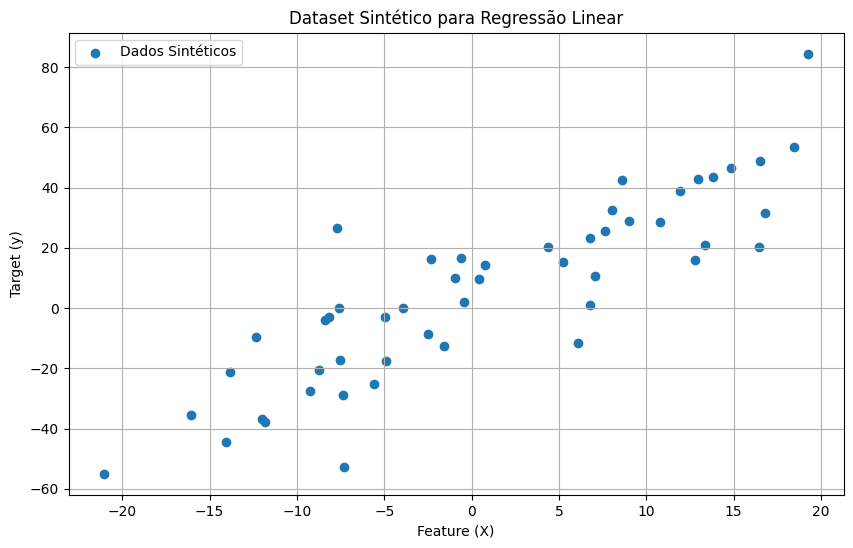

Dimens√£o de X: torch.Size([50, 1])
Dimens√£o de y: torch.Size([50, 1])


In [1]:
# Gera√ß√£o de Dados Sint√©ticos para Regress√£o
import torch
import numpy as np
import matplotlib.pyplot as plt

# Configura√ß√µes para reprodutibilidade
torch.manual_seed(42)

# Definindo os par√¢metros verdadeiros do nosso modelo (que tentaremos aprender)
true_weight = 2.5
true_bias = 0.8

num_points = 50
# Gerando os dados de entrada (features)
X = torch.randn(num_points, 1) * 10

# Gerando os dados de sa√≠da (alvos) com base nos par√¢metros e adicionando ru√≠do
# y = w*X + b + ru√≠do
noise = torch.randn(num_points, 1) * 16
y = true_weight * X + true_bias + noise

# Visualizando os dados gerados
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Sint√©ticos")
plt.title("Dataset Sint√©tico para Regress√£o Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo as dimens√µes dos tensores
print(f"Dimens√£o de X: {X.shape}")
print(f"Dimens√£o de y: {y.shape}")

### Fun√ß√£o de Custo: Erro Quadr√°tico M√©dio (MSE)

Para encontrar os melhores valores de $w$ e $b$, precisamos de uma forma de medir o qu√£o bem o nosso modelo est√° se saindo. A fun√ß√£o de custo (ou fun√ß√£o de perda) quantifica o erro entre os valores previstos ($\hat{y}$) e os valores reais ($y$).

Para a regress√£o linear, a fun√ß√£o de custo mais comum √© o **Erro Quadr√°tico M√©dio** (Mean Squared Error - MSE). Ela calcula a m√©dia dos quadrados das diferen√ßas entre as previs√µes e os valores reais.

A f√≥rmula para o MSE, para um conjunto de $m$ exemplos de treinamento, √©:

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$

Onde:
- $\hat{y}^{(i)} = w x^{(i)} + b$ √© a previs√£o para o $i$-√©simo exemplo.
- $y^{(i)}$ √© o valor real para o $i$-√©simo exemplo.

Nosso objetivo √© minimizar essa fun√ß√£o de custo $J(w, b)$. Um valor menor para o MSE indica um melhor ajuste do modelo aos dados.

### Solu√ß√£o Anal√≠tica: A Equa√ß√£o Normal

Para a regress√£o linear, existe uma solu√ß√£o de forma fechada, ou anal√≠tica, que nos permite encontrar os valores √≥timos dos par√¢metros ($w$ e $b$) de uma s√≥ vez, sem a necessidade de um processo iterativo. Esta solu√ß√£o √© conhecida como **Equa√ß√£o Normal**.

Para us√°-la, primeiro representamos nossos dados de entrada $X$ como uma matriz onde cada linha √© um exemplo de treinamento e adicionamos uma coluna de 1s para representar o termo de bias ($b$). Se $X$ tem $m$ exemplos e $n$ features, a nova matriz, que chamaremos de $X_b$, ter√° dimens√µes $(m, n+1)$. O vetor de par√¢metros $\theta$ incluir√° tanto os pesos $w$ quanto o bias $b$.

A solu√ß√£o que minimiza a fun√ß√£o de custo MSE √© dada por:

$$ \hat{\theta} = (X_b^T X_b)^{-1} X_b^T y $$

Onde:
- $\hat{\theta}$ √© o vetor de par√¢metros √≥timos.
- $X_b$ √© a matriz de features com a coluna de bias adicionada.
- $y$ √© o vetor de valores alvo.
- $(X_b^T X_b)^{-1}$ √© a inversa da matriz $X_b^T X_b$.

Embora seja uma solu√ß√£o direta, o c√°lculo da inversa da matriz $(X_b^T X_b)$ pode ser computacionalmente muito caro, especialmente quando o n√∫mero de features ($n$) √© grande. Por essa raz√£o, m√©todos iterativos como o Gradiente Descendente s√£o mais comuns na pr√°tica, especialmente em deep learning.

Par√¢metros encontrados pela Equa√ß√£o Normal:
Peso (w): 2.4918
Bias (b): 3.5830


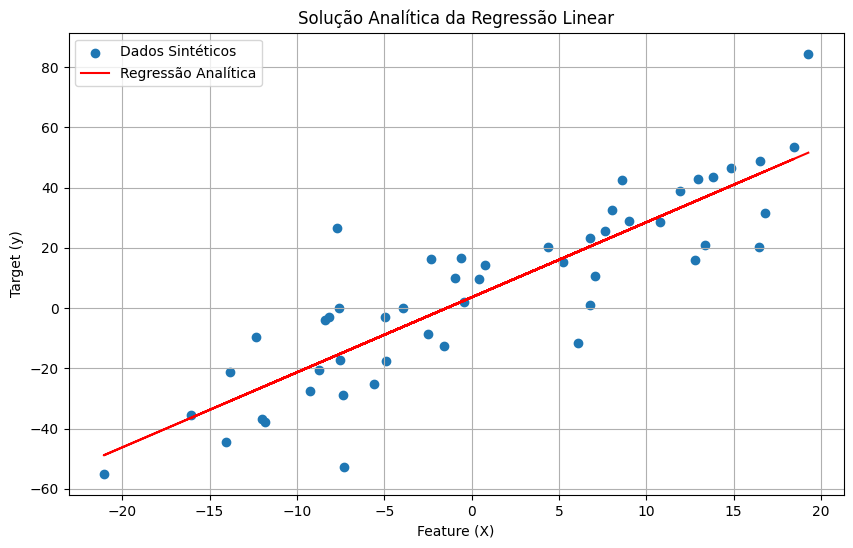

--- Par√¢metros verdadeiros (para compara√ß√£o) ---
Peso real: 2.5
Bias real: 0.8


In [2]:
# Solu√ß√£o com a Equa√ß√£o Normal

# Preparando a matriz X_b adicionando uma coluna de 1s
X_b = torch.cat([torch.ones(X.shape[0], 1), X], dim=1)

# Calculando os par√¢metros √≥timos usando a Equa√ß√£o Normal
# theta = (X_b.T @ X_b)^-1 @ X_b.T @ y
try:
    theta_best = torch.inverse(X_b.T @ X_b) @ X_b.T @ y
    b_analytical = theta_best[0].item()
    w_analytical = theta_best[1].item()

    print(f"Par√¢metros encontrados pela Equa√ß√£o Normal:")
    print(f"Peso (w): {w_analytical:.4f}")
    print(f"Bias (b): {b_analytical:.4f}")

    # Plotando o resultado
    plt.figure(figsize=(10, 6))
    plt.scatter(X.numpy(), y.numpy(), label="Dados Sint√©ticos")
    plt.plot(X.numpy(), (w_analytical * X + b_analytical).numpy(), color='r', label="Regress√£o Anal√≠tica")
    plt.title("Solu√ß√£o Anal√≠tica da Regress√£o Linear")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)
    plt.show()

except torch.linalg.LinAlgError:
    print("A matriz X_b.T @ X_b √© singular e n√£o pode ser invertida.")

print("--- Par√¢metros verdadeiros (para compara√ß√£o) ---")
print(f"Peso real: {true_weight}")
print(f"Bias real: {true_bias}")

### Solu√ß√£o Iterativa: Gradiente Descendente Estoc√°stico (SGD)

Diferente da solu√ß√£o anal√≠tica, o Gradiente Descendente √© um algoritmo de otimiza√ß√£o iterativo que busca minimizar a fun√ß√£o de custo ajustando gradualmente os par√¢metros do modelo. A ideia √© "descer a colina" da fun√ß√£o de custo, dando passos na dire√ß√£o do gradiente negativo.

O **gradiente** √© um vetor que aponta na dire√ß√£o de maior crescimento da fun√ß√£o. Portanto, para minimizar a fun√ß√£o, ajustamos os par√¢metros na dire√ß√£o oposta ao gradiente.

A regra de atualiza√ß√£o para cada par√¢metro (seja $w$ ou $b$) √©:

$$ \theta_{novo} = \theta_{antigo} - \eta \nabla J(\theta) $$

Onde:
- $\theta$ representa um par√¢metro do modelo ($w$ ou $b$).
- $\eta$ (eta) √© a **taxa de aprendizado** (learning rate), um hiperpar√¢metro que controla o tamanho do passo que damos a cada itera√ß√£o.
- $\nabla J(\theta)$ √© o gradiente da fun√ß√£o de custo em rela√ß√£o ao par√¢metro $\theta$.

Existem diferentes variantes do Gradiente Descendente:
1.  **Batch Gradient Descent**: Calcula o gradiente usando todo o conjunto de dados de treinamento. √â preciso, mas lento para datasets grandes.
2.  **Stochastic Gradient Descent (SGD)**: Calcula o gradiente usando apenas um exemplo de treinamento por vez. √â muito mais r√°pido, mas as atualiza√ß√µes s√£o ruidosas.
3.  **Mini-batch Gradient Descent**: Um meio-termo, calcula o gradiente usando um pequeno lote (mini-batch) de exemplos. √â a abordagem mais comum na pr√°tica. No PyTorch, o otimizador `SGD` implementa esta variante.

In [3]:
# Defini√ß√£o do Modelo de Regress√£o Linear em PyTorch
import torch.nn as nn

# Definindo a classe do nosso modelo
# Herda de nn.Module, a classe base para todos os modelos de redes neurais no PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Definimos uma camada linear.
        # in_features=1: nosso modelo espera 1 feature de entrada.
        # out_features=1: nosso modelo produz 1 valor de sa√≠da.
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # A passagem para frente (forward pass) define como a entrada √© processada.
        # Aqui, simplesmente passamos a entrada pela camada linear.
        return self.linear(x)

In [4]:
# Instanciando o modelo
model = LinearRegressionModel()
print("Estrutura do modelo:")
print(model)

Estrutura do modelo:
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
# Os par√¢metros (peso e bias) s√£o inicializados aleatoriamente
# Podemos inspecion√°-los
print("Par√¢metros iniciais (aleat√≥rios):")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Par√¢metros iniciais (aleat√≥rios):
linear.weight: [[-0.846797]]
linear.bias: [0.6920352]


In [6]:
# Hiperpar√¢metros
learning_rate = 0.001
epochs = 200

# Fun√ß√£o de custo (Loss Function)
# Usamos o MSELoss j√° implementado no PyTorch
loss_function = nn.MSELoss()

# Otimizador (Optimizer)
# Usamos o SGD, passando os par√¢metros do modelo e a taxa de aprendizado
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# Loop de Treinamento com SGD
from tqdm import tqdm

# Armazenar o hist√≥rico de perdas para visualiza√ß√£o
losses = []

# Loop de treinamento
for epoch in tqdm(range(epochs), desc="Treinando o modelo"):
    # 1. Forward pass: fazer uma previs√£o
    y_pred = model(X)

    # 2. Calcular a perda (loss)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    # 3. Zerar os gradientes da itera√ß√£o anterior
    optimizer.zero_grad()

    # 4. Backward pass: calcular os gradientes da perda em rela√ß√£o aos par√¢metros
    loss.backward()

    # 5. Atualizar os pesos usando o otimizador
    optimizer.step()

print("\nTreinamento conclu√≠do!")
print(f"Perda final: {losses[-1]:.4f}")

# Imprimindo os par√¢metros aprendidos
print("\nPar√¢metros aprendidos pelo modelo:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Treinando o modelo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 1764.56it/s]


Treinamento conclu√≠do!
Perda final: 219.9089

Par√¢metros aprendidos pelo modelo:
linear.weight: [[2.508861]]
linear.bias: [1.6593777]


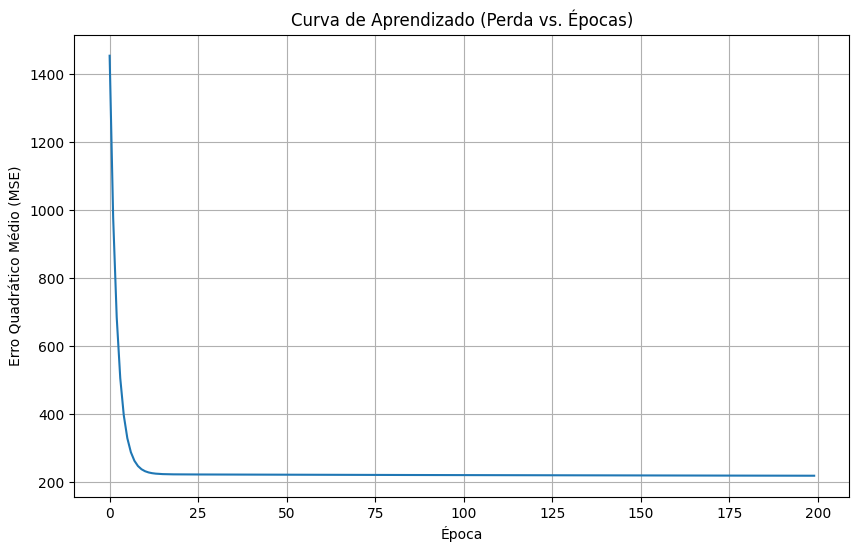

In [8]:
# Plot da Curva de Perda

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. √âpocas)")
plt.xlabel("√âpoca")
plt.ylabel("Erro Quadr√°tico M√©dio (MSE)")
plt.grid(True)
plt.show()

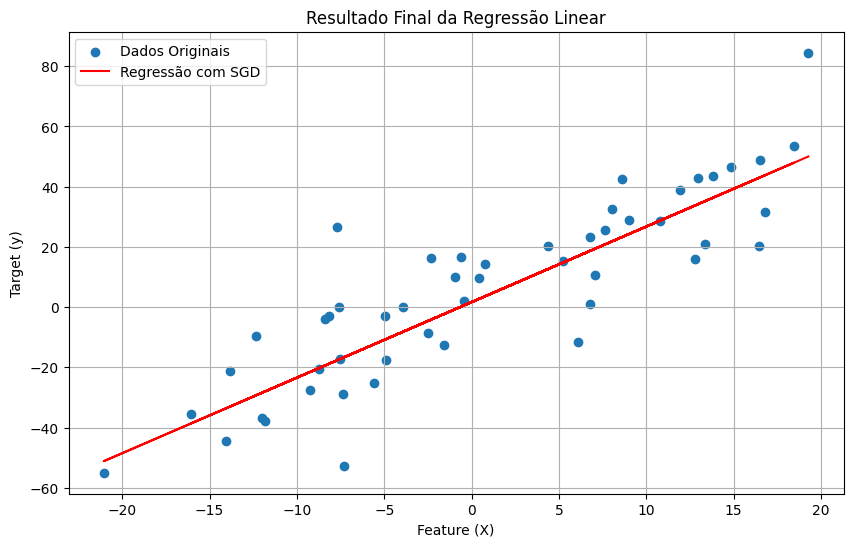

Previs√£o para X = 20.0 -> y = 51.8366


In [9]:
# Infer√™ncia e Visualiza√ß√£o do Modelo Treinado

# Colocando o modelo em modo de avalia√ß√£o
model.eval()

# Fazendo previs√µes com o modelo treinado
with torch.no_grad(): # Desabilita o c√°lculo de gradientes para infer√™ncia
    predicted = model(X).detach().numpy()

# Visualizando o resultado final
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Originais")
plt.plot(X.numpy(), predicted, color='r', label="Regress√£o com SGD")
plt.title("Resultado Final da Regress√£o Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de infer√™ncia para um novo ponto
new_x = torch.tensor([[20.0]]) # Um novo valor de X
with torch.no_grad():
    new_y = model(new_x)
print(f"Previs√£o para X = {new_x.item():.1f} -> y = {new_y.item():.4f}")

### Exerc√≠cios: Regress√£o Linear

#### Exerc√≠cio 1: Regress√£o Linear M√∫ltipla com Dados Sint√©ticos

At√© agora, nosso modelo usou apenas uma vari√°vel de entrada ($x$) para prever a sa√≠da ($y$). Na pr√°tica, a maioria dos problemas envolve m√∫ltiplas vari√°veis de entrada (features). Sua tarefa √© adaptar o c√≥digo para treinar um modelo de **Regress√£o Linear M√∫ltipla**.

A equa√ß√£o do modelo se expande para:

$$\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b$$

**Passos:**

1.  **Gere um novo dataset sint√©tico**: Crie uma matriz de features $X$ com, por exemplo, 200 amostras e 3 features (ou seja, um tensor de dimens√£o `(200, 3)`).
2.  **Defina os Par√¢metros Verdadeiros**: Crie os "pesos verdadeiros" que seu modelo tentar√° aprender. Por exemplo, um tensor `true_weights` de dimens√£o `(3, 1)` como `torch.tensor([[2.5], [-1.8], [0.5]])` e um `true_bias` escalar.
3.  **Calcule o Alvo `y`**: Gere a vari√°vel alvo `y` usando a multiplica√ß√£o de matrizes e adicionando ru√≠do. A equa√ß√£o em PyTorch ser√°: `y = X @ true_weights + true_bias + noise`.
4.  **Ajuste a Classe do Modelo**: Modifique a classe `LinearRegressionModel`. O argumento `in_features` da camada `nn.Linear` deve ser alterado para corresponder ao n√∫mero de features do seu novo dataset $X$.
5.  **Treine e Verifique**: Treine o modelo como antes. Ao final, compare os pesos aprendidos (acess√≠veis via `model.parameters()`) com os `true_weights` que voc√™ definiu no passo 2. Os valores devem ser muito pr√≥ximos, validando a corre√ß√£o da sua implementa√ß√£o.

In [10]:
# Gera√ß√£o de Dados Sint√©ticos para Regress√£o

# Configura√ß√µes para reprodutibilidade
torch.manual_seed(42)

# Definindo os par√¢metros verdadeiros do nosso modelo (que tentaremos aprender)
true_weights = torch.tensor([[2.5], [-0.3], [0.7]])
true_bias = 0.6

num_points = 200
# Gerando os dados de entrada (features)
X = torch.randn(num_points, 3) * 10

# Gerando os dados de sa√≠da (alvos) com base nos par√¢metros e adicionando ru√≠do
# y = w*X + b + ru√≠do
noise = torch.randn(num_points, 1) * 16
y = X @ true_weights + true_bias + noise

# # Visualizando os dados gerados
# plt.figure(figsize=(10, 6))
# plt.scatter(X.numpy(), y.numpy(), label="Dados Sint√©ticos")
# plt.title("Dataset Sint√©tico para Regress√£o Linear")
# plt.xlabel("Feature (X)")
# plt.ylabel("Target (y)")
# plt.legend()
# plt.grid(True)
# plt.show()

# Imprimindo as dimens√µes dos tensores
print(f"Dimens√£o de X: {X.shape}")
print(f"Dimens√£o de y: {y.shape}")

Dimens√£o de X: torch.Size([200, 3])
Dimens√£o de y: torch.Size([200, 1])


In [11]:
# Defini√ß√£o do Modelo de Regress√£o Linear em PyTorch

# Definindo a classe do nosso modelo
# Herda de nn.Module, a classe base para todos os modelos de redes neurais no PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Definimos uma camada linear.
        # in_features=1: nosso modelo espera 1 feature de entrada.
        # out_features=1: nosso modelo produz 1 valor de sa√≠da.
        self.linear = nn.Linear(in_features=3, out_features=1)

    def forward(self, x):
        # A passagem para frente (forward pass) define como a entrada √© processada.
        # Aqui, simplesmente passamos a entrada pela camada linear.
        return self.linear(x)

# Instanciando o modelo
model = LinearRegressionModel()
print("Estrutura do modelo:")
print(model)

# Os par√¢metros (peso e bias) s√£o inicializados aleatoriamente
# Podemos inspecion√°-los
print("Par√¢metros iniciais (aleat√≥rios):")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

# Hiperpar√¢metros
learning_rate = 0.001
epochs = 200

# Fun√ß√£o de custo (Loss Function)
# Usamos o MSELoss j√° implementado no PyTorch
loss_function = nn.MSELoss()

# Otimizador (Optimizer)
# Usamos o SGD, passando os par√¢metros do modelo e a taxa de aprendizado
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Loop de Treinamento com SGD
from tqdm import tqdm

# Armazenar o hist√≥rico de perdas para visualiza√ß√£o
losses = []

# Loop de treinamento
for epoch in tqdm(range(epochs), desc="Treinando o modelo"):
    # 1. Forward pass: fazer uma previs√£o
    y_pred = model(X)

    # 2. Calcular a perda (loss)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    # 3. Zerar os gradientes da itera√ß√£o anterior
    optimizer.zero_grad()

    # 4. Backward pass: calcular os gradientes da perda em rela√ß√£o aos par√¢metros
    loss.backward()

    # 5. Atualizar os pesos usando o otimizador
    optimizer.step()

print("\nTreinamento conclu√≠do!")
print(f"Perda final: {losses[-1]:.4f}")

# Imprimindo os par√¢metros aprendidos
print("\nPar√¢metros aprendidos pelo modelo:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

Estrutura do modelo:
LinearRegressionModel(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)
Par√¢metros iniciais (aleat√≥rios):
linear.weight: [[-0.505809   -0.3176846  -0.41785842]]
linear.bias: [0.28634408]


Treinando o modelo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 2589.66it/s]


Treinamento conclu√≠do!
Perda final: 240.6987

Par√¢metros aprendidos pelo modelo:
linear.weight: [[ 2.6205075  -0.24524225  0.7709007 ]]
linear.bias: [0.30494386]


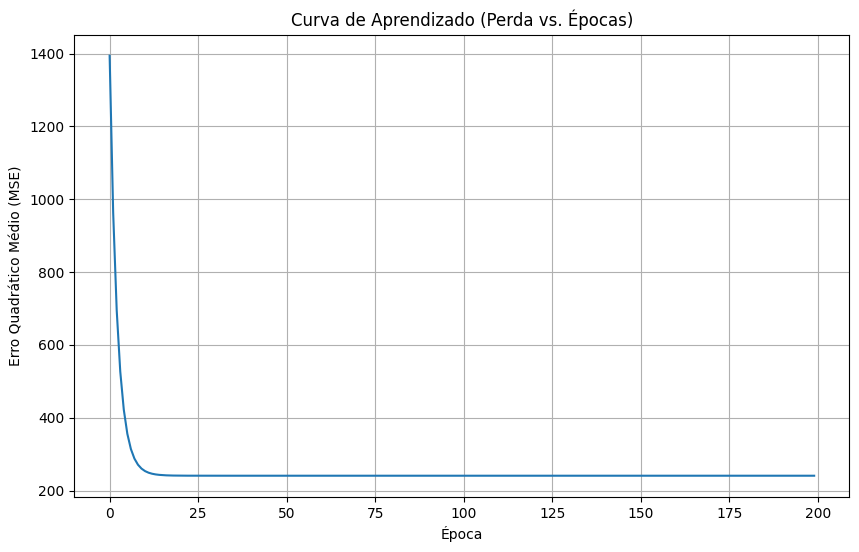

In [12]:
# Plot da Curva de Perda

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. √âpocas)")
plt.xlabel("√âpoca")
plt.ylabel("Erro Quadr√°tico M√©dio (MSE)")
plt.grid(True)
plt.show()


#### Exerc√≠cio 2: O Impacto da Taxa de Aprendizado ($\eta$)

A taxa de aprendizado ($\eta$) √© um dos hiperpar√¢metros mais importantes no treinamento de redes neurais. Ela controla o tamanho dos passos dados durante a otimiza√ß√£o para minimizar a fun√ß√£o de custo, conforme a regra de atualiza√ß√£o:

$$ \theta_{novo} = \theta_{antigo} - \eta \nabla J(\theta) $$

**Sua tarefa √© investigar o efeito de diferentes taxas de aprendizado:**
1.  **Treine o modelo original** (de uma feature, com dados sint√©ticos) usando tr√™s valores diferentes para `learning_rate`:
    * Um valor muito pequeno (ex: `1e-6`).
    * O valor que usamos (ex: `0.001`).
    * Um valor muito grande (ex: `0.1`).
2.  **Plote a curva de perda (MSE vs. √âpocas)** para cada um dos tr√™s experimentos no mesmo gr√°fico.
3.  **Analise e descreva** o que voc√™ observa em cada caso:
    * O que acontece quando $\eta$ √© muito pequeno? A converg√™ncia √© r√°pida ou lenta?
    * O que acontece quando $\eta$ √© muito grande? O modelo consegue convergir? O que o comportamento da curva de perda sugere?

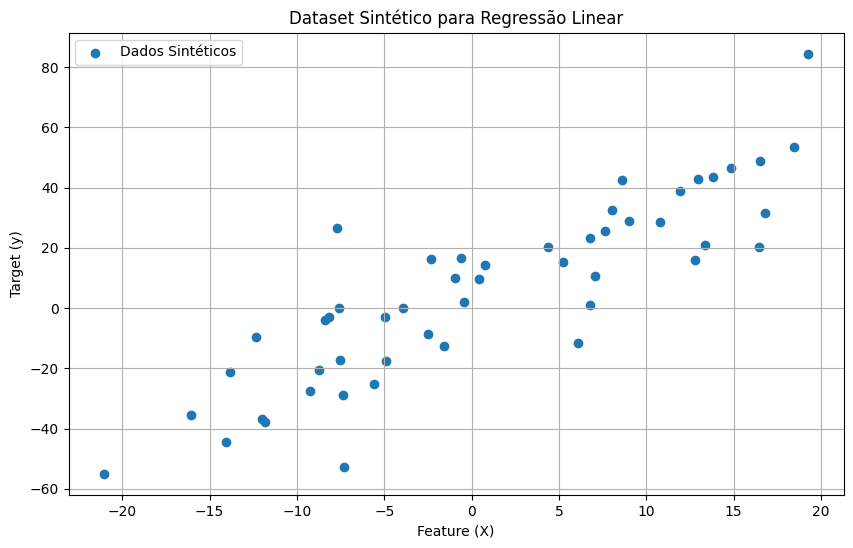

Dimens√£o de X: torch.Size([50, 1])
Dimens√£o de y: torch.Size([50, 1])
Par√¢metros iniciais (aleat√≥rios):
linear.weight: [[-0.846797]]
linear.bias: [0.6920352]


Treinando o modelo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 2303.37it/s]


Treinamento conclu√≠do!
Perda final: 1352.7942

Par√¢metros aprendidos pelo modelo:
linear.weight: [[-0.7036264]]
linear.bias: [0.6944415]


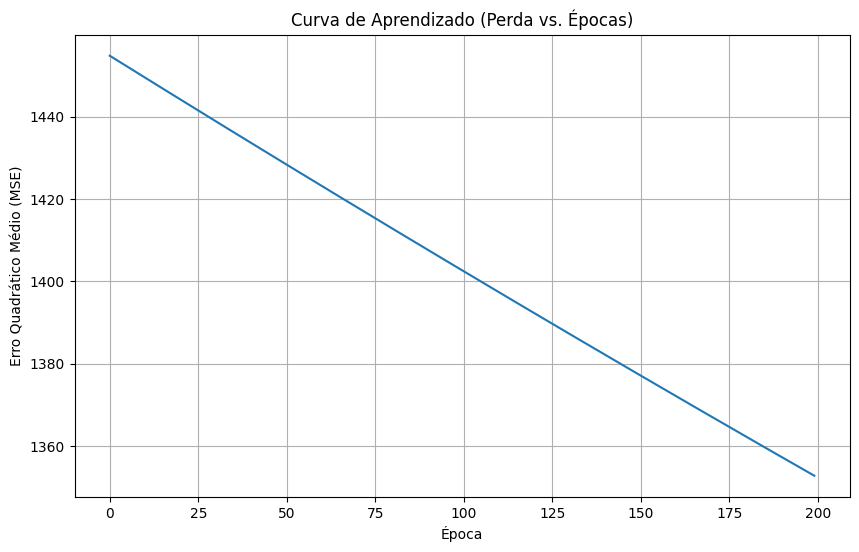

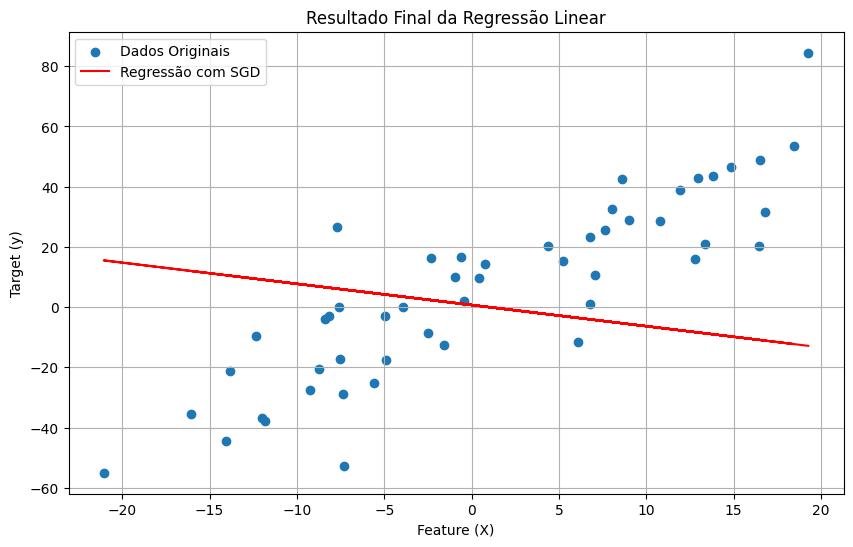

Previs√£o para X = 20.0 -> y = -13.3781


Treinando o modelo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 2584.31it/s]


Treinamento conclu√≠do!
Perda final: 219.9060

Par√¢metros aprendidos pelo modelo:
linear.weight: [[2.5088544]]
linear.bias: [1.6601404]


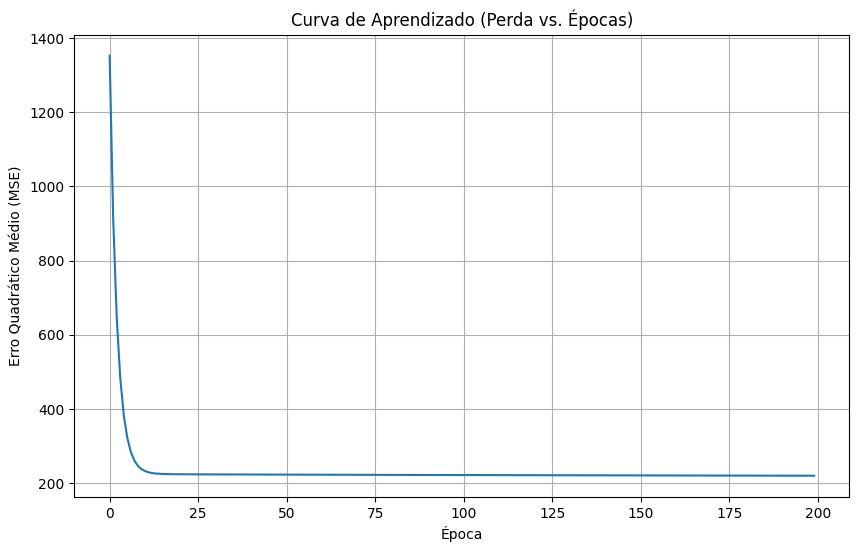

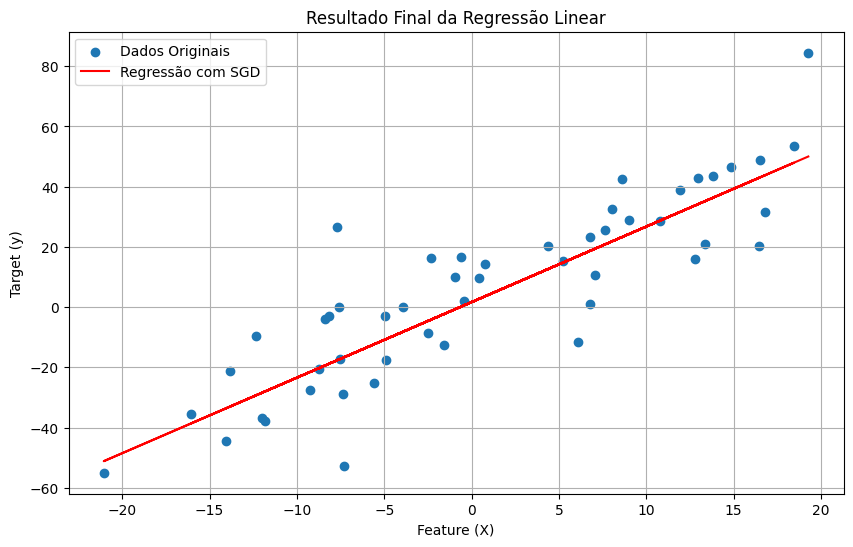

Previs√£o para X = 20.0 -> y = 51.8372


Treinando o modelo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 1804.01it/s]


Treinamento conclu√≠do!
Perda final: nan

Par√¢metros aprendidos pelo modelo:
linear.weight: [[nan]]
linear.bias: [nan]


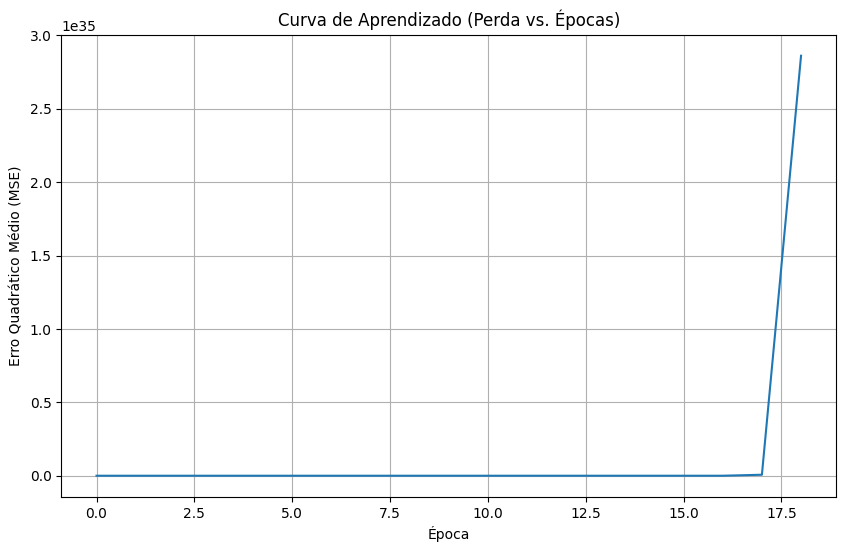

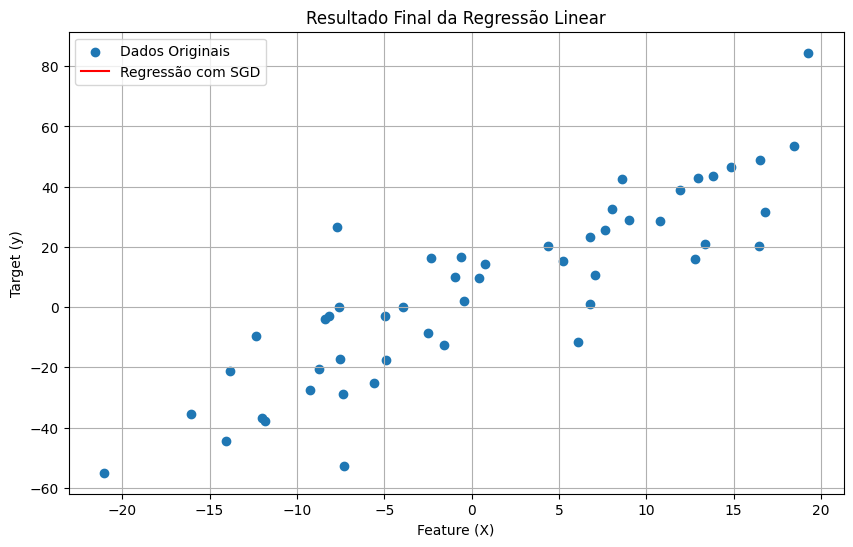

Previs√£o para X = 20.0 -> y = nan


In [13]:
# Gera√ß√£o de Dados Sint√©ticos para Regress√£o
import torch
import numpy as np
import matplotlib.pyplot as plt

# Configura√ß√µes para reprodutibilidade
torch.manual_seed(42)

# Definindo os par√¢metros verdadeiros do nosso modelo (que tentaremos aprender)
true_weight = 2.5
true_bias = 0.8

num_points = 50
# Gerando os dados de entrada (features)
X = torch.randn(num_points, 1) * 10

# Gerando os dados de sa√≠da (alvos) com base nos par√¢metros e adicionando ru√≠do
# y = w*X + b + ru√≠do
noise = torch.randn(num_points, 1) * 16
y = true_weight * X + true_bias + noise

# Visualizando os dados gerados
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Sint√©ticos")
plt.title("Dataset Sint√©tico para Regress√£o Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo as dimens√µes dos tensores
print(f"Dimens√£o de X: {X.shape}")
print(f"Dimens√£o de y: {y.shape}")

# Defini√ß√£o do Modelo de Regress√£o Linear em PyTorch

# Definindo a classe do nosso modelo
# Herda de nn.Module, a classe base para todos os modelos de redes neurais no PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Definimos uma camada linear.
        # in_features=1: nosso modelo espera 1 feature de entrada.
        # out_features=1: nosso modelo produz 1 valor de sa√≠da.
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # A passagem para frente (forward pass) define como a entrada √© processada.
        # Aqui, simplesmente passamos a entrada pela camada linear.
        return self.linear(x)

# Instanciando o modelo
model = LinearRegressionModel()

# Os par√¢metros (peso e bias) s√£o inicializados aleatoriamente
# Podemos inspecion√°-los
print("Par√¢metros iniciais (aleat√≥rios):")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

# Hiperpar√¢metros
learning_rates = [1e-6, 0.001, 0.1]
epochs = 200

for learning_rate in learning_rates:
  # Fun√ß√£o de custo (Loss Function)
  # Usamos o MSELoss j√° implementado no PyTorch
  loss_function = nn.MSELoss()

  # Otimizador (Optimizer)
  # Usamos o SGD, passando os par√¢metros do modelo e a taxa de aprendizado
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Loop de Treinamento com SGD

  # Armazenar o hist√≥rico de perdas para visualiza√ß√£o
  losses = []

  # Loop de treinamento
  for epoch in tqdm(range(epochs), desc="Treinando o modelo"):
      # 1. Forward pass: fazer uma previs√£o
      y_pred = model(X)

      # 2. Calcular a perda (loss)
      loss = loss_function(y_pred, y)
      losses.append(loss.item())

      # 3. Zerar os gradientes da itera√ß√£o anterior
      optimizer.zero_grad()

      # 4. Backward pass: calcular os gradientes da perda em rela√ß√£o aos par√¢metros
      loss.backward()

      # 5. Atualizar os pesos usando o otimizador
      optimizer.step()

  print("\nTreinamento conclu√≠do!")
  print(f"Perda final: {losses[-1]:.4f}")

  # Imprimindo os par√¢metros aprendidos
  print("\nPar√¢metros aprendidos pelo modelo:")
  for name, param in model.named_parameters():
      if param.requires_grad:
          print(f"{name}: {param.data.numpy()}")

  # Plot da Curva de Perda

  plt.figure(figsize=(10, 6))
  plt.plot(range(epochs), losses)
  plt.title("Curva de Aprendizado (Perda vs. √âpocas)")
  plt.xlabel("√âpoca")
  plt.ylabel("Erro Quadr√°tico M√©dio (MSE)")
  plt.grid(True)
  plt.show()

  # Infer√™ncia e Visualiza√ß√£o do Modelo Treinado

  # Colocando o modelo em modo de avalia√ß√£o
  model.eval()

  # Fazendo previs√µes com o modelo treinado
  with torch.no_grad(): # Desabilita o c√°lculo de gradientes para infer√™ncia
      predicted = model(X).detach().numpy()

  # Visualizando o resultado final
  plt.figure(figsize=(10, 6))
  plt.scatter(X.numpy(), y.numpy(), label="Dados Originais")
  plt.plot(X.numpy(), predicted, color='r', label="Regress√£o com SGD")
  plt.title("Resultado Final da Regress√£o Linear")
  plt.xlabel("Feature (X)")
  plt.ylabel("Target (y)")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Exemplo de infer√™ncia para um novo ponto
  new_x = torch.tensor([[20.0]]) # Um novo valor de X
  with torch.no_grad():
      new_y = model(new_x)
  print(f"Previs√£o para X = {new_x.item():.1f} -> y = {new_y.item():.4f}")

- quando o ùúÇ √© muito pequeno a converg√™ncia acontece de maneira muito lenta, dando a parecer que o gr√°fico foi quase uma reta
- quando o ùúÇ √© muito grande o modelo n√£o converge, tendo um comportamento inesperado dando passos descontrolados

## 3. Regress√£o Log√≠stica

Enquanto a regress√£o linear √© usada para prever valores cont√≠nuos, a **Regress√£o Log√≠stica** √© usada para problemas de **classifica√ß√£o**, onde o objetivo √© prever uma categoria discreta (por exemplo, 0 ou 1, "sim" ou "n√£o", "gato" ou "cachorro").

Apesar do nome "regress√£o", √© um modelo de classifica√ß√£o. Ele adapta o modelo linear para produzir uma probabilidade, que pode ser ent√£o usada para determinar a classe.

### Fun√ß√£o de Ativa√ß√£o Sigmoid

Para transformar a sa√≠da de um modelo linear (que pode ser qualquer valor real) em uma probabilidade (um valor entre 0 e 1), usamos uma **fun√ß√£o de ativa√ß√£o**. Para a Regress√£o Log√≠stica, a fun√ß√£o utilizada √© a **Sigmoid** (ou fun√ß√£o log√≠stica).

A fun√ß√£o Sigmoid √© definida como:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Onde $z$ √© a sa√≠da do modelo linear ($z = \mathbf{w}^T \mathbf{x} + b$).

- Se $z$ for muito grande e positivo, $e^{-z}$ se aproxima de 0, e $\sigma(z)$ se aproxima de 1.
- Se $z$ for muito grande e negativo, $e^{-z}$ se aproxima do infinito, e $\sigma(z)$ se aproxima de 0.
- Se $z = 0$, $\sigma(z) = 0.5$.

A sa√≠da $\sigma(z)$ pode ser interpretada como a probabilidade de a amostra pertencer √† classe positiva (classe 1).
$$ \hat{p} = P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) $$

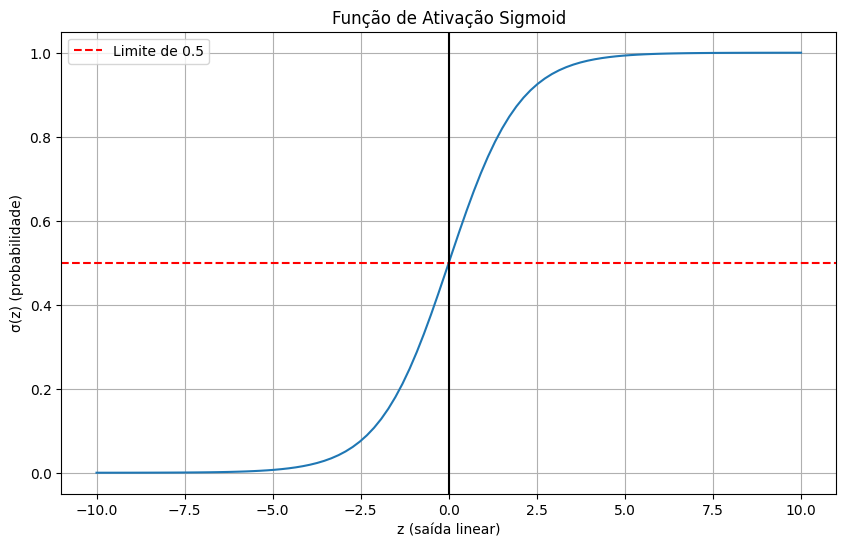

In [14]:
# Visualiza√ß√£o da Fun√ß√£o Sigmoid

# Gerando valores para z
z = np.linspace(-10, 10, 100)

# Calculando a sigmoid
sigmoid = 1 / (1 + np.exp(-z))

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid)
plt.title("Fun√ß√£o de Ativa√ß√£o Sigmoid")
plt.xlabel("z (sa√≠da linear)")
plt.ylabel("œÉ(z) (probabilidade)")
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label="Limite de 0.5")
plt.axvline(x=0.0, color='k', linestyle='-')
plt.legend()
plt.show()

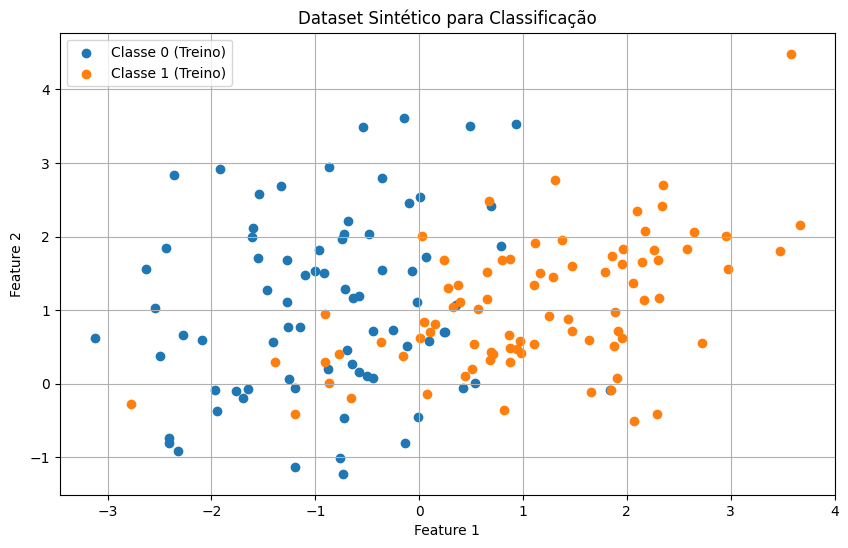

In [15]:
# Gera√ß√£o de Dados Sint√©ticos para Classifica√ß√£o
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Gerando um dataset linearmente separ√°vel
X_clf, y_clf = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Convertendo para tensores do PyTorch
X_clf = torch.from_numpy(X_clf).float()
y_clf = torch.from_numpy(y_clf).float().view(-1, 1) # Redimensiona para (200, 1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Visualizando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train.squeeze() == 0][:, 0], X_train[y_train.squeeze() == 0][:, 1], label="Classe 0 (Treino)")
plt.scatter(X_train[y_train.squeeze() == 1][:, 0], X_train[y_train.squeeze() == 1][:, 1], label="Classe 1 (Treino)")
plt.title("Dataset Sint√©tico para Classifica√ß√£o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Fun√ß√£o de Custo: Entropia Cruzada Bin√°ria (Log-Loss)

Para problemas de classifica√ß√£o, o MSE n√£o √© uma boa escolha, pois a fun√ß√£o de custo pode se tornar n√£o-convexa, dificultando a otimiza√ß√£o. Em vez disso, usamos a **Entropia Cruzada Bin√°ria** (Binary Cross-Entropy), tamb√©m conhecida como **Log-Loss**.

Essa fun√ß√£o penaliza fortemente as previs√µes que est√£o confiantes e erradas. A f√≥rmula para um √∫nico exemplo √©:

$$ J(\theta) = -[y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})] $$

Onde:
- $y$ √© o r√≥tulo verdadeiro (0 ou 1).
- $\hat{p}$ √© a probabilidade prevista para a classe 1 ($\sigma(z)$).

Analisando a f√≥rmula:
- Se $y=1$, o custo √© $-\log(\hat{p})$. O custo √© baixo se $\hat{p}$ est√° pr√≥ximo de 1, e muito alto se est√° pr√≥ximo de 0.
- Se $y=0$, o custo √© $-\log(1 - \hat{p})$. O custo √© baixo se $\hat{p}$ est√° pr√≥ximo de 0, e muito alto se est√° pr√≥ximo de 1.

Para $m$ exemplos, a fun√ß√£o de custo √© a m√©dia das perdas individuais:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] $$

In [16]:
# Modelo e Treinamento da Regress√£o Log√≠stica

# Definindo a classe do modelo
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        # 2 features de entrada, 1 sa√≠da (antes da sigmoid)
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        # Passa pela camada linear e depois pela sigmoid
        return torch.sigmoid(self.linear(x))

In [17]:
# Instanciando o modelo
clf_model = LogisticRegressionModel()

In [18]:
# Hiperpar√¢metros
learning_rate_clf = 0.1
epochs_clf = 300

# Fun√ß√£o de custo e otimizador
# BCELoss: Binary Cross Entropy Loss
loss_function_clf = nn.BCELoss()
optimizer_clf = torch.optim.SGD(clf_model.parameters(), lr=learning_rate_clf)

In [19]:
# Listas para armazenar m√©tricas
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Loop de treinamento
for epoch in tqdm(range(epochs_clf), desc="Treinando o classificador"):
    clf_model.train() # Modo de treinamento

    # Treino
    y_pred_train = clf_model(X_train)
    loss_train = loss_function_clf(y_pred_train, y_train)
    train_losses.append(loss_train.item())

    optimizer_clf.zero_grad()
    loss_train.backward()
    optimizer_clf.step()

    # C√°lculo da acur√°cia de treino
    predicted_labels_train = (y_pred_train >= 0.5).float()
    acc_train = (predicted_labels_train == y_train).float().mean()
    train_accuracies.append(acc_train.item())

    # Valida√ß√£o (teste)
    clf_model.eval() # Modo de avalia√ß√£o
    with torch.no_grad():
        y_pred_test = clf_model(X_test)
        loss_test = loss_function_clf(y_pred_test, y_test)
        test_losses.append(loss_test.item())

        # C√°lculo da acur√°cia de teste
        predicted_labels_test = (y_pred_test >= 0.5).float()
        acc_test = (predicted_labels_test == y_test).float().mean()
        test_accuracies.append(acc_test.item())

print("\nTreinamento conclu√≠do!")
print(f"Acur√°cia final de teste: {test_accuracies[-1]:.4f}")

Treinando o classificador: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 1416.82it/s]


Treinamento conclu√≠do!
Acur√°cia final de teste: 0.8500


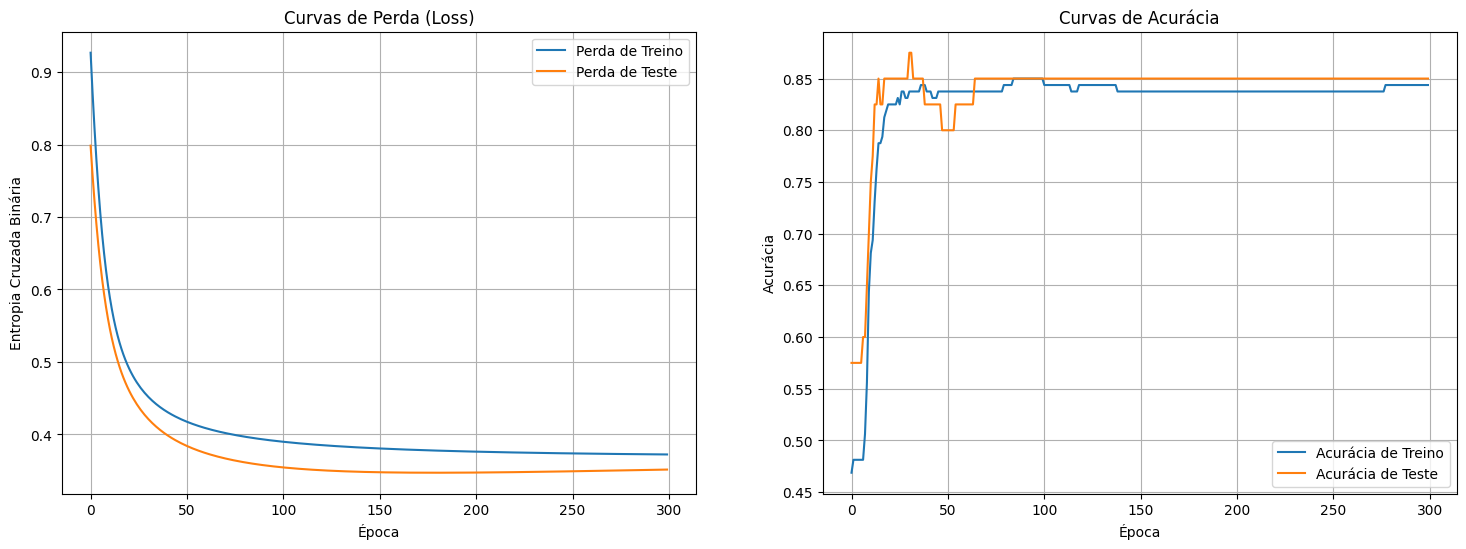

In [20]:
# Plot das Curvas de Custo e Acur√°cia

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot da Perda (Loss)
ax1.plot(train_losses, label="Perda de Treino")
ax1.plot(test_losses, label="Perda de Teste")
ax1.set_title("Curvas de Perda (Loss)")
ax1.set_xlabel("√âpoca")
ax1.set_ylabel("Entropia Cruzada Bin√°ria")
ax1.grid(True)
ax1.legend()

# Plot da Acur√°cia
ax2.plot(train_accuracies, label="Acur√°cia de Treino")
ax2.plot(test_accuracies, label="Acur√°cia de Teste")
ax2.set_title("Curvas de Acur√°cia")
ax2.set_xlabel("√âpoca")
ax2.set_ylabel("Acur√°cia")
ax2.grid(True)
ax2.legend()

plt.show()

### Fronteira de Decis√£o

A fronteira de decis√£o √© a linha (ou superf√≠cie, em dimens√µes maiores) que separa as √°reas onde o modelo prev√™ uma classe daquelas onde prev√™ a outra. Para a Regress√£o Log√≠stica, a previs√£o √© 1 se $\sigma(z) \ge 0.5$ e 0 caso contr√°rio. Isso acontece quando o argumento da sigmoid, $z$, √© igual a 0.

Portanto, a fronteira de decis√£o √© a linha definida pela equa√ß√£o:

$$ \mathbf{w}^T \mathbf{x} + b = 0 $$

Visualizar essa fronteira nos ajuda a entender como o modelo est√° separando os dados.

/tmp/ipython-input-3343128259.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
/tmp/ipython-input-3343128259.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, 0.02))


Probabilidade para o novo ponto: 0.0269
Classe prevista para o novo ponto: 0


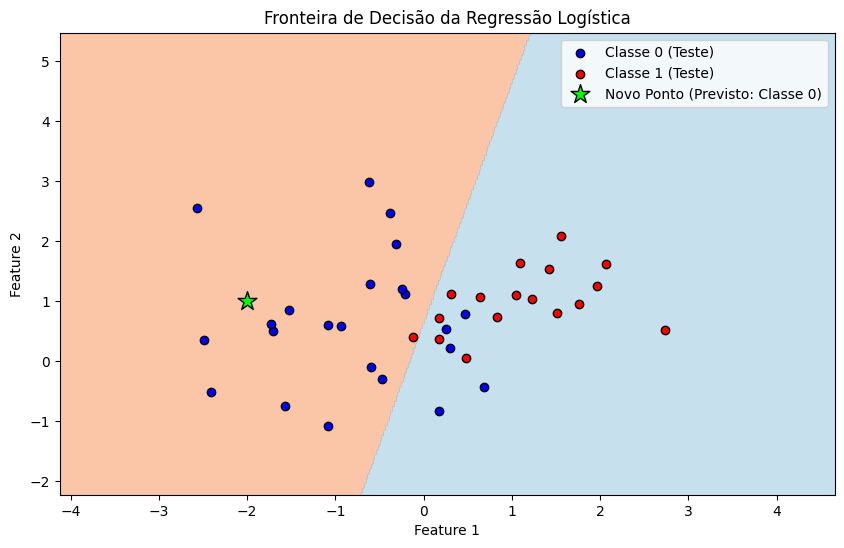

In [21]:
 # Plot da Fronteira de Decis√£o

# Colocar o modelo em modo de avalia√ß√£o
clf_model.eval()

# Criar um grid de pontos para plotar a fronteira
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Fazer previs√µes para cada ponto no grid
grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
with torch.no_grad():
    Z = clf_model(grid_tensor)
Z = Z.reshape(xx.shape)

# Plotar a fronteira e os dados de teste
plt.figure(figsize=(10, 6))
# A fronteira de decis√£o (contorno onde a probabilidade √© 0.5)
plt.contourf(xx, yy, Z.detach().numpy() > 0.5, cmap=plt.cm.RdYlBu, alpha=0.5)

# Plotar os dados de teste
plt.scatter(X_test[y_test.squeeze() == 0][:, 0], X_test[y_test.squeeze() == 0][:, 1], label="Classe 0 (Teste)", c='blue', edgecolors='k')
plt.scatter(X_test[y_test.squeeze() == 1][:, 0], X_test[y_test.squeeze() == 1][:, 1], label="Classe 1 (Teste)", c='red', edgecolors='k')

# Exemplo de infer√™ncia em um novo ponto
new_point = torch.tensor([[-2.0, 1.0]])
with torch.no_grad():
    prediction_prob = clf_model(new_point)
    prediction_class = (prediction_prob >= 0.5).item()

# Plotar o novo ponto
plt.scatter(new_point[:, 0], new_point[:, 1], c='lime', marker='*', s=200, edgecolors='k', label=f'Novo Ponto (Previsto: Classe {int(prediction_class)})')
print(f"Probabilidade para o novo ponto: {prediction_prob.item():.4f}")
print(f"Classe prevista para o novo ponto: {int(prediction_class)}")


plt.title("Fronteira de Decis√£o da Regress√£o Log√≠stica")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Exerc√≠cios: Regress√£o Log√≠stica

#### Exerc√≠cio 1: Portas L√≥gicas AND e OR

As portas l√≥gicas s√£o os blocos de constru√ß√£o fundamentais da computa√ß√£o digital. Sua tarefa √© usar a Regress√£o Log√≠stica para modelar as portas **AND** e **OR**.

**Tabelas Verdade:**

| $x_1$ | $x_2$ | AND | OR |
|:---:|:---:|:---:|:--:|
| 0   | 0   | 0   | 0  |
| 0   | 1   | 0   | 1  |
| 1   | 0   | 0   | 1  |
| 1   | 1   | 1   | 1  |

**Passos:**
1.  **Crie dois datasets**: um para a porta AND e outro para a porta OR. Cada dataset deve conter m√∫ltiplos exemplos para cada uma das quatro combina√ß√µes de entrada (ex: 20 pontos para `(0,0)`, 20 para `(0,1)`, etc.).
2.  **Adicione um pouco de ru√≠do gaussiano** aos dados de entrada $X$ para que os pontos n√£o sejam exatamente 0 ou 1. Isso torna o problema de classifica√ß√£o mais realista.
3.  **Treine um modelo de Regress√£o Log√≠stica** para cada porta l√≥gica.
4.  **Plote a fronteira de decis√£o** para cada modelo treinado. Voc√™ deve observar que o modelo consegue encontrar uma linha reta que separa perfeitamente as classes 0 e 1 para ambas as portas, pois elas s√£o problemas **linearmente separ√°veis**.

*texto em it√°lico*#### Exerc√≠cio 2: O Desafio da Porta L√≥gica XOR

Agora, vamos tentar o mesmo com a porta **XOR** (OU exclusivo).

**Tabela Verdade XOR:**

| $x_1$ | $x_2$ | XOR |
|:---:|:---:|:---:|
| 0   | 0   | 0   |
| 0   | 1   | 1   |
| 1   | 0   | 1   |
| 1   | 1   | 0   |

**Passos:**
1.  **Crie um dataset para a porta XOR**, seguindo a mesma abordagem do exerc√≠cio anterior (m√∫ltiplos pontos com ru√≠do para cada combina√ß√£o de entrada).
2.  **Treine um modelo de Regress√£o Log√≠stica** para classificar os dados XOR.
3.  **Plote a fronteira de decis√£o** e a curva de acur√°cia.
4.  **Analise e responda**:
    * O que voc√™ observa no gr√°fico da fronteira de decis√£o?
    * Qual a acur√°cia m√°xima que o seu modelo consegue atingir? Por que voc√™ acha que ela fica estagnada em torno desse valor?
    * √â poss√≠vel tra√ßar uma **√∫nica linha reta** que separe as sa√≠das da classe 0 (pontos `(0,0)` e `(1,1)`) das sa√≠das da classe 1 (pontos `(0,1)` e `(1,0)`)?

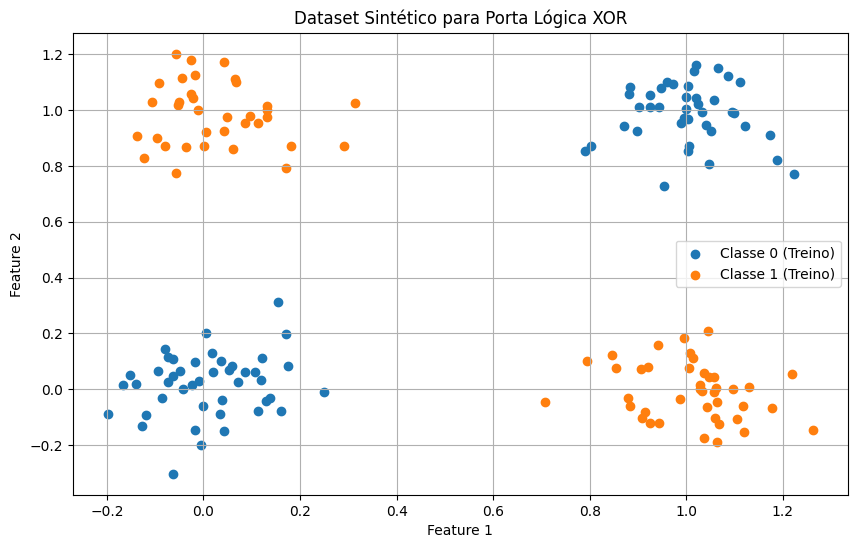

Dimens√£o de X_xor: torch.Size([200, 2])
Dimens√£o de y_xor: torch.Size([200, 1])


In [23]:
# Exerc√≠cio 2: O Desafio da Porta L√≥gica XOR

# 1. Criar dataset para a porta XOR
def create_xor_dataset(num_points_per_combination=50, noise_std=0.1):
    """Cria um dataset sint√©tico para a porta l√≥gica XOR com ru√≠do."""
    X = []
    y = []

    # Combinac√µes de entrada e sa√≠das correspondentes
    combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]
    outcomes = [0, 1, 1, 0] # XOR

    for (x1, x2), outcome in zip(combinations, outcomes):
        # Gerar pontos com ru√≠do em torno de cada combina√ß√£o
        points_x1 = np.random.normal(x1, noise_std, num_points_per_combination)
        points_x2 = np.random.normal(x2, noise_std, num_points_per_combination)
        X.extend(zip(points_x1, points_x2))
        y.extend([outcome] * num_points_per_combination)

    X = torch.tensor(X).float()
    y = torch.tensor(y).float().view(-1, 1)
    return X, y

X_xor, y_xor = create_xor_dataset(num_points_per_combination=50, noise_std=0.1)

# Dividindo os dados em conjuntos de treino e teste
X_train_xor, X_test_xor, y_train_xor, y_test_xor = train_test_split(
    X_xor, y_xor, test_size=0.2, random_state=42
)

# Visualizando os dados XOR
plt.figure(figsize=(10, 6))
plt.scatter(X_train_xor[y_train_xor.squeeze() == 0][:, 0], X_train_xor[y_train_xor.squeeze() == 0][:, 1], label="Classe 0 (Treino)")
plt.scatter(X_train_xor[y_train_xor.squeeze() == 1][:, 0], X_train_xor[y_train_xor.squeeze() == 1][:, 1], label="Classe 1 (Treino)")
plt.title("Dataset Sint√©tico para Porta L√≥gica XOR")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print(f"Dimens√£o de X_xor: {X_xor.shape}")
print(f"Dimens√£o de y_xor: {y_xor.shape}")

In [24]:
# 2. Treinar um modelo de Regress√£o Log√≠stica para XOR

# Instanciando um novo modelo para o problema XOR
xor_model = LogisticRegressionModel() # Reutiliza a classe definida anteriormente

# Hiperpar√¢metros (ajustados para este problema se necess√°rio)
learning_rate_xor = 0.1
epochs_xor = 500 # Pode precisar de mais √©pocas para "ver" o padr√£o

# Fun√ß√£o de custo e otimizador
loss_function_xor = nn.BCELoss()
optimizer_xor = torch.optim.SGD(xor_model.parameters(), lr=learning_rate_xor)

# Listas para armazenar m√©tricas
train_losses_xor = []
test_losses_xor = []
train_accuracies_xor = []
test_accuracies_xor = []

# Loop de treinamento
for epoch in tqdm(range(epochs_xor), desc="Treinando o classificador XOR"):
    xor_model.train() # Modo de treinamento

    # Treino
    y_pred_train_xor = xor_model(X_train_xor)
    loss_train_xor = loss_function_xor(y_pred_train_xor, y_train_xor)
    train_losses_xor.append(loss_train_xor.item())

    optimizer_xor.zero_grad()
    loss_train_xor.backward()
    optimizer_xor.step()

    # C√°lculo da acur√°cia de treino
    predicted_labels_train_xor = (y_pred_train_xor >= 0.5).float()
    acc_train_xor = (predicted_labels_train_xor == y_train_xor).float().mean()
    train_accuracies_xor.append(acc_train_xor.item())

    # Valida√ß√£o (teste)
    xor_model.eval() # Modo de avalia√ß√£o
    with torch.no_grad():
        y_pred_test_xor = xor_model(X_test_xor)
        loss_test_xor = loss_function_xor(y_pred_test_xor, y_test_xor)
        test_losses_xor.append(loss_test_xor.item())

        # C√°lculo da acur√°cia de teste
        predicted_labels_test_xor = (y_pred_test_xor >= 0.5).float()
        acc_test_xor = (predicted_labels_test_xor == y_test_xor).float().mean()
        test_accuracies_xor.append(acc_test_xor.item())

print("\nTreinamento do modelo XOR conclu√≠do!")
print(f"Acur√°cia final de teste (XOR): {test_accuracies_xor[-1]:.4f}")

Treinando o classificador XOR: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:00<00:00, 1532.08it/s]


Treinamento do modelo XOR conclu√≠do!
Acur√°cia final de teste (XOR): 0.6250


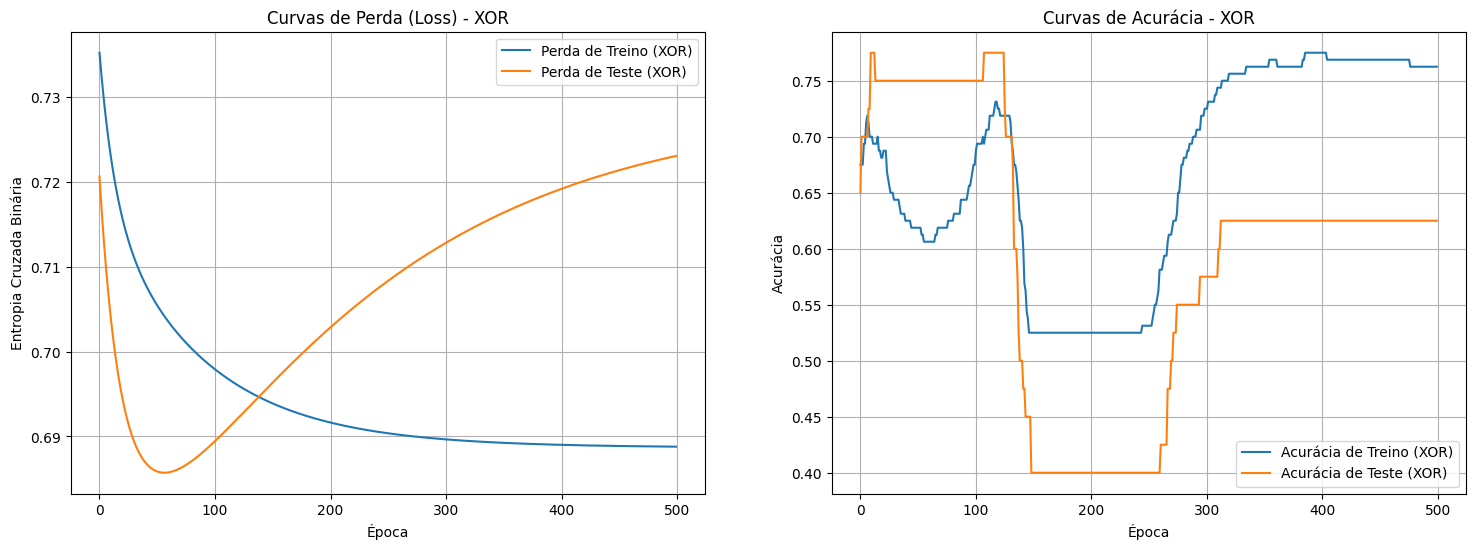

/tmp/ipython-input-3680773605.py:35: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
/tmp/ipython-input-3680773605.py:36: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, 0.02))


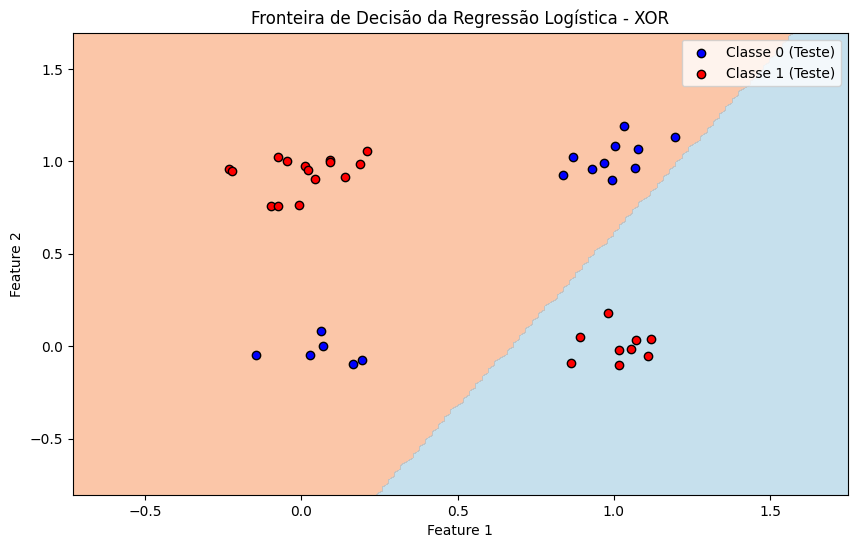

In [25]:
# 3. Plotar a fronteira de decis√£o e a curva de acur√°cia para XOR

# Plot das Curvas de Custo e Acur√°cia para XOR

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot da Perda (Loss)
ax1.plot(train_losses_xor, label="Perda de Treino (XOR)")
ax1.plot(test_losses_xor, label="Perda de Teste (XOR)")
ax1.set_title("Curvas de Perda (Loss) - XOR")
ax1.set_xlabel("√âpoca")
ax1.set_ylabel("Entropia Cruzada Bin√°ria")
ax1.grid(True)
ax1.legend()

# Plot da Acur√°cia
ax2.plot(train_accuracies_xor, label="Acur√°cia de Treino (XOR)")
ax2.plot(test_accuracies_xor, label="Acur√°cia de Teste (XOR)")
ax2.set_title("Curvas de Acur√°cia - XOR")
ax2.set_xlabel("√âpoca")
ax2.set_ylabel("Acur√°cia")
ax2.grid(True)
ax2.legend()

plt.show()

# Plot da Fronteira de Decis√£o para XOR

# Colocar o modelo em modo de avalia√ß√£o
xor_model.eval()

# Criar um grid de pontos para plotar a fronteira
x_min, x_max = X_xor[:, 0].min() - 0.5, X_xor[:, 0].max() + 0.5
y_min, y_max = X_xor[:, 1].min() - 0.5, X_xor[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Fazer previs√µes para cada ponto no grid
grid_tensor_xor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
with torch.no_grad():
    Z_xor = xor_model(grid_tensor_xor)
Z_xor = Z_xor.reshape(xx.shape)

# Plotar a fronteira e os dados de teste
plt.figure(figsize=(10, 6))
# A fronteira de decis√£o (contorno onde a probabilidade √© 0.5)
plt.contourf(xx, yy, Z_xor.detach().numpy() > 0.5, cmap=plt.cm.RdYlBu, alpha=0.5)

# Plotar os dados de teste
plt.scatter(X_test_xor[y_test_xor.squeeze() == 0][:, 0], X_test_xor[y_test_xor.squeeze() == 0][:, 1], label="Classe 0 (Teste)", c='blue', edgecolors='k')
plt.scatter(X_test_xor[y_test_xor.squeeze() == 1][:, 0], X_test_xor[y_test_xor.squeeze() == 1][:, 1], label="Classe 1 (Teste)", c='red', edgecolors='k')

plt.title("Fronteira de Decis√£o da Regress√£o Log√≠stica - XOR")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

4. **An√°lise e Resposta:**

* O que voc√™ observa no gr√°fico da fronteira de decis√£o? Uma classe separada.

* Qual a acur√°cia m√°xima que o seu modelo consegue atingir? Por que voc√™ acha que ela fica estagnada em torno desse valor? 0.8, acredito que fica estagnada pela disposi√ß√£o espacial dos dados

* √â poss√≠vel tra√ßar uma **√∫nica linha reta** que separe as sa√≠das da classe 0 (pontos `(0,0)` e `(1,1)`) das sa√≠das da classe 1 (pontos `(0,1)` e `(1,0)`)? N√£o.